In [61]:
import os
import zipfile
import numpy as np
from helpers import load_csv_data  # 确保 helpers.py 中定义了 load_csv_data 函数


In [94]:
# A test for software
# 定义数据路径 
data_path = "/Users/ww/Downloads/project1/data/dataset"
        # 加载数据
column_names,x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_path, sub_sample=False)

print("数据加载成功")

        # 打印前10行数据
print("y_train 的前10个标签:")
print(y_train[:10])

print("\nx_train 的前10行:")
print(x_train[:10])

print("\ntest_ids 的前10个ID:")
print(test_ids[:10])

columns_to_drop = ['FMONTH','IDATE','IMONTH','IDAY','IYEAR','DISPCODE','SEQNO','_PSU','CTELNUM1','CELLFON2','LANDLINE','NUMHHOL2','NUMPHON2','CPDEMO1','WHRTST10','_CLLCPWT','_DUALUSE','_DUALCOR','_LLCPWT']
indices_to_drop = [i for i, col in enumerate(column_names[1:]) if col in columns_to_drop]
# 删除指定的列

x_train = np.delete(x_train, indices_to_drop, axis=1)
# 输出删除后的 x_train的前10行
print("\n=== 删除后的 x_train的前10行 ===")
print(x_train[:10])

数据加载成功
y_train 的前10个标签:
[-1 -1 -1 -1 -1 -1 -1  1  1 -1]

x_train 的前10行:
[[5.3000000e+01 1.1000000e+01 1.1162015e+07 ...           nan
            nan 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2152015e+07 ...           nan
            nan           nan]
 [2.0000000e+01 1.0000000e+01 1.0202015e+07 ... 1.0000000e+00
  2.0000000e+00 2.0000000e+00]
 ...
 [4.4000000e+01 3.0000000e+00 3.0720150e+06 ... 1.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [2.1000000e+01 7.0000000e+00 7.3120150e+06 ...           nan
            nan 2.0000000e+00]
 [4.0000000e+00 6.0000000e+00 6.2320150e+06 ...           nan
            nan           nan]]

test_ids 的前10个ID:
[328135 328136 328137 328138 328139 328140 328141 328142 328143 328144]

=== 删除后的 x_train的前10行 ===
[[53. nan nan ... nan nan  2.]
 [33.  1.  1. ... nan nan nan]
 [20.  1.  1. ...  1.  2.  2.]
 ...
 [44.  1.  1. ...  1.  2.  2.]
 [21. nan nan ... nan nan  2.]
 [ 4. nan nan ... nan nan nan]]


In [99]:
column_names.remove('Id')
new_column_names = [col for i, col in enumerate(column_names) if i not in indices_to_drop]
print(f"新列名数量: {len(new_column_names)}")
print(f"新列名预览: {new_column_names[:5]} ...")

新列名数量: 302
新列名预览: ['_STATE', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES'] ...


合并数据

In [108]:
y_train = y_train[:x_train.shape[0]] 
print(f"x_train shape: {x_train.shape}")  # 检查 x_train 的形状
print(f"y_train shape: {y_train.shape}")  # 检查 y_train 的形状

# 确保 y_train 是二维数组，方便合并（转换为列向量）
y_train = y_train.reshape(-1, 1)

# 合并 x_train 和 y_train，按列拼接
data = np.hstack((x_train, y_train))
data_column_names = new_column_names + ['_MICHD']

# 打印合并后的数据维度
print(f"合并后的 data shape: {data.shape}")

# 检查前几行的数据
print("\n合并后的数据预览:")
print(data[:5])
print(len(data_column_names))


x_train shape: (328135, 302)
y_train shape: (328135, 1)
合并后的 data shape: (328135, 303)

合并后的数据预览:
[[53. nan nan ... nan  2. -1.]
 [33.  1.  1. ... nan nan -1.]
 [20.  1.  1. ...  2.  2. -1.]
 [42. nan nan ...  2.  2. -1.]
 [24.  1.  1. ...  9.  2. -1.]]
303


对空值进行计算处理

In [103]:

# 1. 计算每列的空值数量
nan_counts = np.isnan(data).sum(axis=0)

# 2. 计算每列的总行数（不考虑 NaN）
total_rows = data.shape[0]

# 3. 计算每列的空值比例
nan_ratios = nan_counts / total_rows

# 4. 打印每列的空值数量和比例
for i, (count, ratio) in enumerate(zip(nan_counts, nan_ratios)):
    print(f"第 {i+1} 列的空值数量：{count}，空值比例：{ratio:.2%}")


第 1 列的空值数量：0，空值比例：0.00%
第 2 列的空值数量：139415，空值比例：42.49%
第 3 列的空值数量：139415，空值比例：42.49%
第 4 列的空值数量：328103，空值比例：99.99%
第 5 列的空值数量：139416，空值比例：42.49%
第 6 列的空值数量：139415，空值比例：42.49%
第 7 列的空值数量：328103，空值比例：99.99%
第 8 列的空值数量：139433，空值比例：42.49%
第 9 列的空值数量：139524，空值比例：42.52%
第 10 列的空值数量：139525，空值比例：42.52%
第 11 列的空值数量：188721，空值比例：57.51%
第 12 列的空值数量：188720，空值比例：57.51%
第 13 列的空值数量：327334，空值比例：99.76%
第 14 列的空值数量：188719，空值比例：57.51%
第 15 列的空值数量：192544，空值比例：58.68%
第 16 列的空值数量：2，空值比例：0.00%
第 17 列的空值数量：1，空值比例：0.00%
第 18 列的空值数量：0，空值比例：0.00%
第 19 列的空值数量：159860，空值比例：48.72%
第 20 列的空值数量：0，空值比例：0.00%
第 21 列的空值数量：0，空值比例：0.00%
第 22 列的空值数量：1，空值比例：0.00%
第 23 列的空值数量：1，空值比例：0.00%
第 24 列的空值数量：1，空值比例：0.00%
第 25 列的空值数量：196334，空值比例：59.83%
第 26 列的空值数量：0，空值比例：0.00%
第 27 列的空值数量：43801，空值比例：13.35%
第 28 列的空值数量：43801，空值比例：13.35%
第 29 列的空值数量：0，空值比例：0.00%
第 30 列的空值数量：0，空值比例：0.00%
第 31 列的空值数量：284153，空值比例：86.60%
第 32 列的空值数量：1，空值比例：0.00%
第 33 列的空值数量：0，空值比例：0.00%
第 34 列的空值数量：0，空值比例：0.00%
第 35 列的空值数量：1，空值比例：0.00%
第 36 列的空值数量：0，空值比例：0.0

删除空值大于10%的列

In [109]:

# 找出空值比例 <= 10% 的列索引
columns_to_keep = np.where(nan_ratios <= 0.10)[0]

# 删除空值比例大于 10% 的列
data_del_nan = data[:, columns_to_keep]

column_names_nan = [data_column_names[i] for i in columns_to_keep]

# 打印结果
print(f"删除后的数据集维度：{data_del_nan.shape}")
print(f"保留的列索引：{columns_to_keep}")
print(f"处理后的数据集：\n{data_del_nan}")


删除后的数据集维度：(328135, 130)
保留的列索引：[  0  15  16  17  19  20  21  22  23  25  28  29  31  32  33  34  35  36
  37  39  40  41  42  43  44  45  46  47  48  49  51  52  53  54  55  56
  57  58  62  63  67  68  69  70  71  72  73  80  85  86  89  90 201 202
 204 205 206 207 211 212 213 214 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 259 260 261 262
 263 264 265 268 269 278 279 286 287 288 289 290 291 292 293 294 295 296
 297 298 301 302]
处理后的数据集：
[[53.  2.  1. ...  1.  2. -1.]
 [33.  4. 88. ...  9. nan -1.]
 [20.  2. 77. ...  1.  2. -1.]
 ...
 [39.  3. 88. ...  2.  2. -1.]
 [33.  3. 88. ...  1.  2. -1.]
 [32.  2.  7. ...  1.  2. -1.]]


异常值处理

In [110]:
import numpy as np

# 使用Z-Score检测每列的异常值，并返回所有异常样本的索引
def detect_outliers(data, threshold=3):
    outlier_indices = set()
    for i in range(data.shape[1]):  # 遍历每一列
        feature_data = data[:, i]
        mean, std = np.mean(feature_data), np.std(feature_data)
        z_scores = np.abs((feature_data - mean) / std)  # 计算Z分数

        # 找到大于阈值的样本索引
        column_outliers = np.where(z_scores > threshold)[0]
        outlier_indices.update(column_outliers)  # 添加到异常样本集合

    return list(outlier_indices)

# 检测所有列中的异常值
outlier_indices = detect_outliers(data_del_nan)
print(f"Found {len(outlier_indices)} outliers.")

# 删除检测到的异常样本
def remove_outliers(data, outlier_indices):
    return np.delete(data, outlier_indices, axis=0)

# 删除异常值后的数据集
data_del_outlier = remove_outliers(data_del_nan, outlier_indices)
print(f"New Data Shape after Removing Outliers: {data_del_outlier.shape}")


Found 127450 outliers.
New Data Shape after Removing Outliers: (200685, 130)


In [111]:
# 用列均值的整数填充缺失值
def fill_missing_values_with_mean_int(data):
    for i in range(data.shape[1]):  # 遍历每一列
        if np.any(np.isnan(data[:, i])):  # 如果该列有缺失值
            mean_value = np.nanmean(data[:, i])  # 计算均值（忽略nan）
            mean_value_int = int(round(mean_value))  # 将均值四舍五入为整数
            data[np.isnan(data[:, i]), i] = mean_value_int  # 用整数均值填充
    return data

# 填充缺失值
data_fill_missing_values = fill_missing_values_with_mean_int(data_del_outlier)
print("Missing values filled with integer mean values.")

Missing values filled with integer mean values.


In [118]:
print(data_fill_missing_values.shape)
print(column_names_nan)

(200685, 130)
['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BLOODCHO', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'ALCDAY5', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'STRENGTH', 'SEATBELT', 'FLUSHOT6', 'PNEUVAC3', 'HIVTST6', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', '_RAWRAKE', '_WT2RAKE', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR1', '_PRACE1', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACE_G1', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G', 'HTIN4', 'HTM4', 'WTKG3', '_BMI5', '_BMI5CAT', '_RFBMI5', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_SMOKER3', '_RFSM

开始对数据进行标准化

In [121]:
import numpy as np

# 指定要标准化的列名
columns_to_standardize = [
    'STRFREQ_', 'FC60_', 'MAXVO2_', '_FRUTSUM', 'VEGEDA1_ORNGDAY_', 
    'GRENDAY_', 'BEANDAY_', 'FRUTDA1_', 'FTJUDA1_', '_RFDRHV5', 
    '_DRNKWEK', 'DROCDY3_', '_BMI5', 'WTKG3', 'HTM4', 'HTIN4', 
    '_AGE80', '_AGEG5YR', '_WT2RAKE', '_STRWT', '_STSTR', 'STRENGTH', 
    'VEGETAB1', 'FVORANG', 'FVGREEN', 'FVBEANS', 'FRUIT1', 'FRUITJU1', 
    'ALCDAY5', 'HEIGHT3', 'WEIGHT2'
]

# 获取这些列的索引
indices_to_standardize = [
    i for i, col in enumerate(column_names_nan) if col in columns_to_standardize
]

# 提取要标准化的列
data_to_standardize = data_fill_missing_values[:, indices_to_standardize]

# 手动计算均值和标准差
means = np.mean(data_to_standardize, axis=0)
stds = np.std(data_to_standardize, axis=0)

# 防止标准差为0（避免除以0错误）
stds[stds == 0] = 1

# 标准化数据
data_standardized = (data_to_standardize - means) / stds

# 将标准化后的数据替换回原数据集中
data_fill_missing_values[:, indices_to_standardize] = data_standardized

# 打印标准化后的数据形状和前几行检查
print(f"标准化后的数据 shape: {data_fill_missing_values.shape}")
print("\n标准化后的数据预览（前5行）：")
print(data_fill_missing_values[:5])


标准化后的数据 shape: (200685, 130)

标准化后的数据预览（前5行）：
[[ 5.30000000e+01  2.00000000e+00  1.00000000e+00  5.00000000e+00
   1.00000000e+00  1.00000000e+00  2.00000000e+00  1.00000000e+00
   3.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
   2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
   1.00000000e+00  2.00000000e+00  3.00000000e+00  2.00000000e+00
   1.00000000e+00  5.00000000e+00  1.00000000e+00  2.00000000e+00
   1.00000000e+00  8.80000000e+01  8.00000000e+00  1.00000000e+00
  -2.28995331e-01 -9.22369137e-02  1.00000000e+00  2.00000000e+00
   2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
   2.00000000e+00  1.00000000e+00  3.00000000e+00  1.05546068e+00
   1.11358195e+00  3.97094972e-02 -1.04454242e-02  4.40813417e-01
   1.19290392e-01 -1.12904020e-01  1.00000000e+00 -1.32164424e+00
   1.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
   2.00000000e+01  1.00000000e+00  1.42010646e+00  2.90645701e-01
   1.00000000e+00  1.54360692e

将处理好的数据保存为x_train_pre y_train_pre文件

In [122]:
import csv
import numpy as np

# 定义保存数据的函数
def save_to_csv(file_path, data, column_names=None):
    """保存数据为 CSV 文件"""
    with open(file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # 如果有列名，先写入列名
        if column_names:
            writer.writerow(column_names)

        # 写入数据
        writer.writerows(data)

# 将 data_fill_missing_values 拆分成 x_train_pre 和 y_train_pre
x_train_pre = data_fill_missing_values[:, :-1]  # 除最后一列外的所有列
y_train_pre = data_fill_missing_values[:, -1]   # 最后一列作为 y_train_pre

# 检查拆分后的数据形状
print(f"x_train_pre shape: {x_train_pre.shape}")
print(f"y_train_pre shape: {y_train_pre.shape}")

# 设置输出路径
x_train_path = "/Users/ww/Downloads/project1/data/x_train_pre.csv"
y_train_path = "/Users/ww/Downloads/project1/data/y_train_pre.csv"

# 保存 x_train_pre 和 y_train_pre 到不同的 CSV 文件
save_to_csv(x_train_path, x_train_pre, column_names=column_names_nan)
save_to_csv(y_train_path, y_train_pre.reshape(-1, 1), column_names=['Target'])

print(f"x_train_pre 已成功保存到 {x_train_path}")
print(f"y_train_pre 已成功保存到 {y_train_path}")


x_train_pre shape: (200685, 129)
y_train_pre shape: (200685,)
x_train_pre 已成功保存到 /Users/ww/Downloads/project1/data/x_train_pre.csv
y_train_pre 已成功保存到 /Users/ww/Downloads/project1/data/y_train_pre.csv


数据可视化

将绘制的列的索引: [42, 44, 45, 55, 54, 78, 80, 111]
图像已保存为: fig1.png


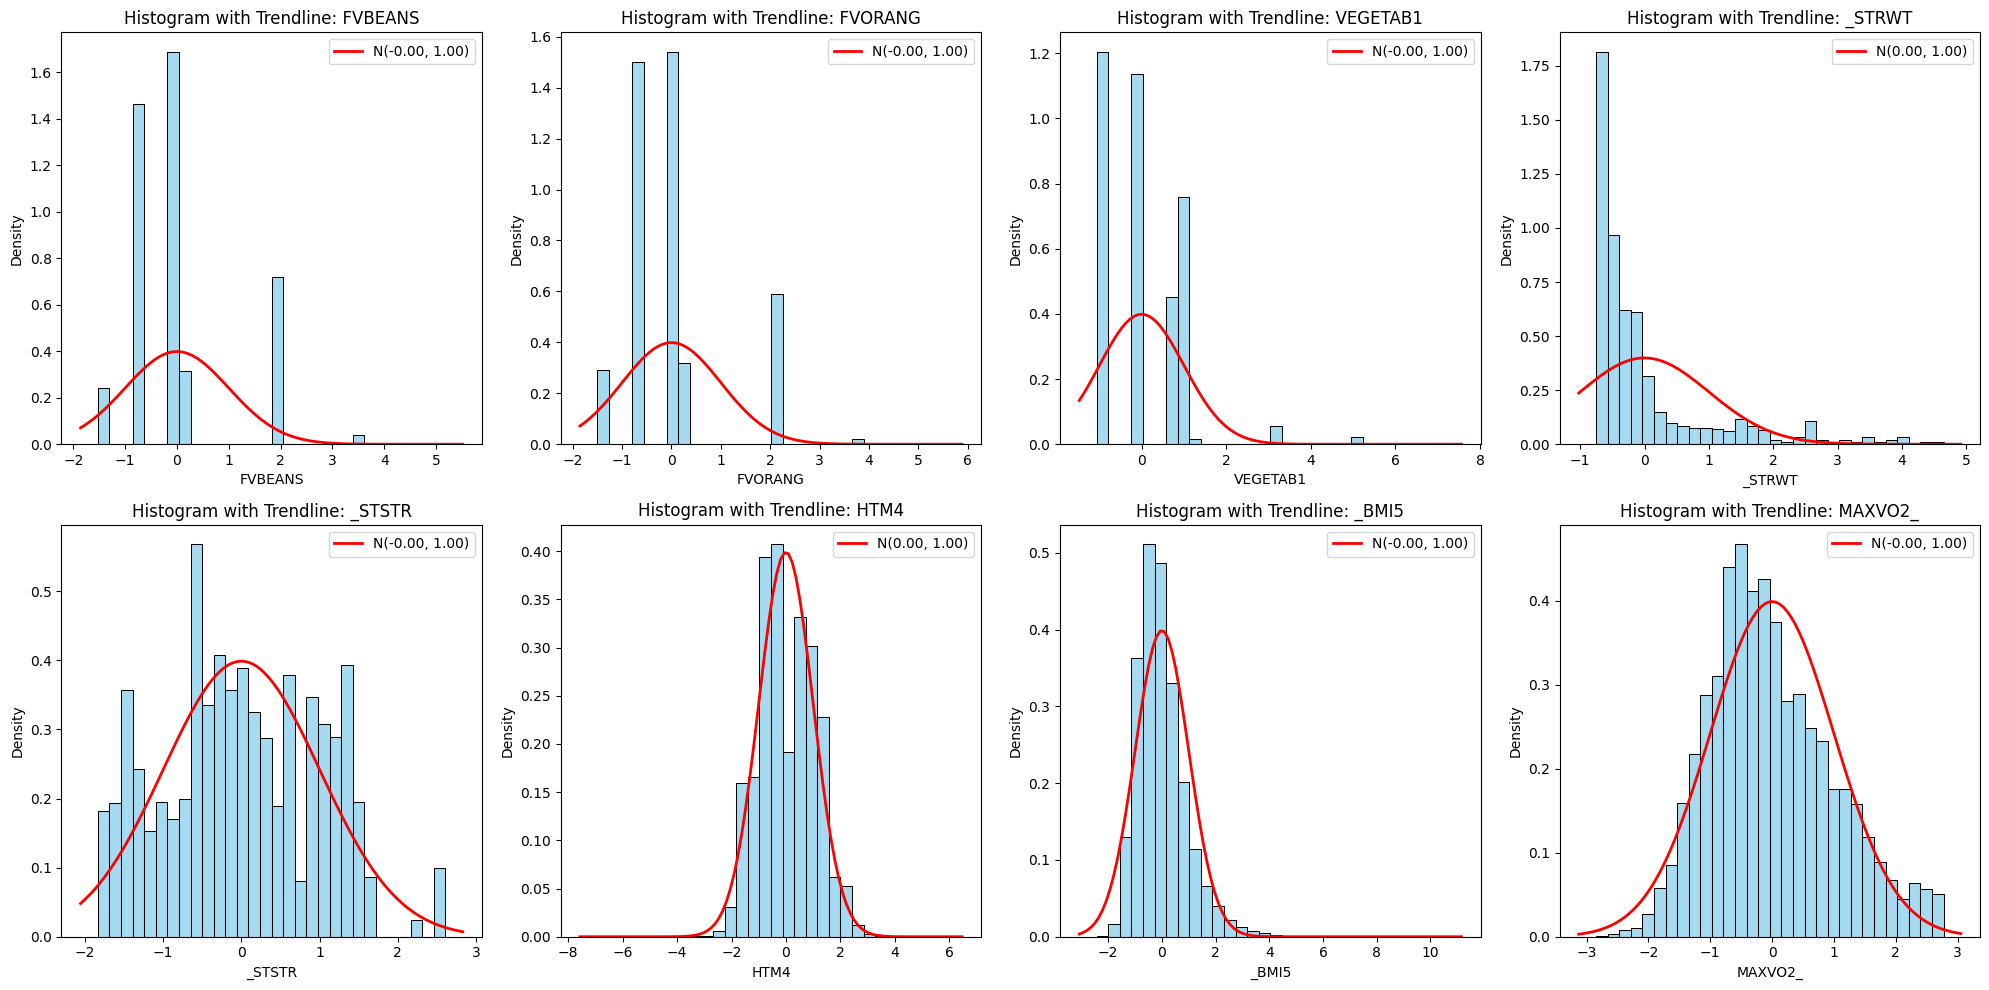

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 指定要绘制的列名
columns_to_plot = ['FVBEANS', 'FVORANG', 'VEGETAB1', 
                   '_STRWT', '_STSTR', 'HTM4', '_BMI5', 'MAXVO2_']

# 获取这些列的索引
indices_to_plot = [column_names_nan.index(col) for col in columns_to_plot]

# 检查索引是否正确匹配
print(f"将绘制的列的索引: {indices_to_plot}")

# 提取 x_train_pre 中这些列的数据
data_to_plot = x_train_pre[:, indices_to_plot]

# 可视化每列数据的直方图并叠加正态分布趋势线
def plot_histograms_with_trendline(data, column_names, save_path=None):
    num_cols = len(column_names)
    rows = (num_cols + 3) // 4  # 四列两行布局

    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))  # 设置画布大小

    for i, ax in enumerate(axes.flatten()):
        if i < num_cols:
            # 获取当前列的数据
            col_data = data[:, i]

            # 计算均值和标准差
            mu = np.mean(col_data)
            sigma = np.std(col_data)

            # 绘制直方图
            sns.histplot(col_data, bins=30, kde=False, stat="density", ax=ax, 
                         color='skyblue', edgecolor='black')

            # 生成正态分布曲线的数据
            xmin, xmax = ax.get_xlim()
            x = np.linspace(xmin, xmax, 100)
            y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

            # 绘制正态分布曲线
            ax.plot(x, y, 'r-', linewidth=2, label=f'N({mu:.2f}, {sigma:.2f})')

            # 设置标题和标签
            ax.set_title(f"Histogram with Trendline: {column_names[i]}")
            ax.set_xlabel(column_names[i])
            ax.set_ylabel("Density")
            ax.legend()  # 添加图例
        else:
            ax.axis('off')  # 隐藏多余的子图

    plt.tight_layout()

    # 如果指定了保存路径，则保存图像
    if save_path:
        fig.savefig(save_path)
        print(f"图像已保存为: {save_path}")

    plt.show()

# 绘制指定列的直方图，并保存为 fig1.png
plot_histograms_with_trendline(data_to_plot, columns_to_plot, save_path="fig1.png")


为了避免数据’泄漏‘ 需要将测试集分开处理 处理步骤同上 

In [131]:
print(len(column_names_nan))
print(len(column_names))

130
321


In [133]:
import numpy as np

# 指定要提取的列名
columns_to_extract = column_names_nan[:-1]  # 使用列表切片 因为最后一列是target 所以删除

# 获取这些列在 column_names 中的索引
indices_to_extract = [column_names.index(col) for col in columns_to_extract]#这里减1的原因是数据里去除了id列 所以减1

# 检查索引是否正确匹配
print(f"要提取的列的索引: {indices_to_extract}")

# 从 x_test 中提取这些列的数据
extracted_data = x_test[:, indices_to_extract]

import numpy as np

# 用列均值的整数填充缺失值
def fill_missing_values_with_mean_int(data):
    for i in range(data.shape[1]):  # 遍历每一列
        if np.any(np.isnan(data[:, i])):  # 如果该列有缺失值
            mean_value = np.nanmean(data[:, i])  # 计算均值（忽略nan）
            mean_value_int = int(round(mean_value))  # 将均值四舍五入为整数
            data[np.isnan(data[:, i]), i] = mean_value_int  # 用整数均值填充
    return data

# 填充缺失值
x_test_fill_missing_values = fill_missing_values_with_mean_int(extracted_data)
print("Missing values filled with integer mean values.")

# 指定要标准化的列名
columns_to_standardize = [
    'STRFREQ_', 'FC60_', 'MAXVO2_', '_FRUTSUM', 'VEGEDA1_ORNGDAY_', 
    'GRENDAY_', 'BEANDAY_', 'FRUTDA1_', 'FTJUDA1_', '_RFDRHV5', 
    '_DRNKWEK', 'DROCDY3_', '_BMI5', 'WTKG3', 'HTM4', 'HTIN4', 
    '_AGE80', '_AGEG5YR', '_WT2RAKE', '_STRWT', '_STSTR', 'STRENGTH', 
    'VEGETAB1', 'FVORANG', 'FVGREEN', 'FVBEANS', 'FRUIT1', 'FRUITJU1', 
    'ALCDAY5', 'HEIGHT3', 'WEIGHT2'
]

# 获取这些列的索引
indices_to_standardize = [
    i for i, col in enumerate(column_names_nan) if col in columns_to_standardize
]

# 提取要标准化的列
x_test_to_standardize = x_test_fill_missing_values[:, indices_to_standardize]

# 手动计算均值和标准差
x_test_means = np.mean(x_test_to_standardize, axis=0)
x_test_stds = np.std(x_test_to_standardize, axis=0)

# 防止标准差为0（避免除以0错误）
stds[stds == 0] = 1

# 标准化数据
x_test_standardized = (x_test_to_standardize - means) / stds

# 将标准化后的数据替换回原数据集中
x_test_fill_missing_values[:, indices_to_standardize] = x_test_standardized

# 打印标准化后的数据形状和前几行检查
print(f"标准化后的数据 shape: {x_test_fill_missing_values.shape}")
print("\n标准化后的数据预览（前5行）：")
print(data_fill_missing_values[:5])




output_path = "/Users/ww/Downloads/project1/data/x_test_pre.csv"
np.savetxt(output_path, extracted_data, delimiter=",", header=",".join(columns_to_extract), comments="", fmt="%s")

print(f"\n提取的列已保存到: {output_path}")


要提取的列的索引: [0, 26, 27, 28, 30, 31, 32, 33, 34, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 81, 82, 83, 84, 85, 86, 87, 94, 99, 100, 103, 104, 216, 217, 219, 220, 221, 222, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 287, 288, 297, 298, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 320]
Missing values filled with integer mean values.
标准化后的数据 shape: (109379, 129)

标准化后的数据预览（前5行）：
[[ 5.30000000e+01  2.00000000e+00  1.00000000e+00  5.00000000e+00
   1.00000000e+00  1.00000000e+00  2.00000000e+00  1.00000000e+00
   3.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
   2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
   1.00000000e+00  2.00000000e+00  3